In [ ]:
from vfield import render_flow_field
import torch
import matplotlib.pyplot as plt
from PIL import Image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

vfields = []
for i in range(11):
    vfield = torch.load(f'../data/vfield_epoch_{i}.pt')
    vfields.append(vfield)

In [ ]:
# Examine the structure of vector fields
print(f"Total vector fields loaded: {len(vfields)}")
print(f"Structure of vfield[1]: {vfields[1].keys()}")
print(f"Grid shape: {vfields[1]['grid'].shape}")
print(f"Displacement shape: {vfields[1]['displacement'].shape}")
print(f"Grid dtype: {vfields[1]['grid'].dtype}")
print(f"Displacement dtype: {vfields[1]['displacement'].dtype}")

# Check the range of coordinates
grid1 = vfields[1]['grid']
disp1 = vfields[1]['displacement']
print(f"\nGrid 1 - X range: [{grid1[:, 0].min():.3f}, {grid1[:, 0].max():.3f}]")
print(f"Grid 1 - Y range: [{grid1[:, 1].min():.3f}, {grid1[:, 1].max():.3f}]")
print(f"Displacement 1 - X range: [{disp1[:, 0].min():.3f}, {disp1[:, 0].max():.3f}]")
print(f"Displacement 1 - Y range: [{disp1[:, 1].min():.3f}, {disp1[:, 1].max():.3f}]")

grid2 = vfields[2]['grid']
disp2 = vfields[2]['displacement']
print(f"\nGrid 2 - X range: [{grid2[:, 0].min():.3f}, {grid2[:, 0].max():.3f}]")
print(f"Grid 2 - Y range: [{grid2[:, 1].min():.3f}, {grid2[:, 1].max():.3f}]")
print(f"Displacement 2 - X range: [{disp2[:, 0].min():.3f}, {disp2[:, 0].max():.3f}]")
print(f"Displacement 2 - Y range: [{disp2[:, 1].min():.3f}, {disp2[:, 1].max():.3f}]")

# Check if grids are the same
grids_equal = torch.allclose(grid1, grid2)
print(f"\nGrids are equal: {grids_equal}")

In [ ]:
import numpy as np
from PIL import Image

def interpolate_vector_fields(vfield1, vfield2, alpha):
    """
    Interpolate between two vector fields using linear interpolation.
    
    Args:
        vfield1: First vector field dict with 'grid' and 'displacement'
        vfield2: Second vector field dict with 'grid' and 'displacement'
        alpha: Interpolation factor (0.0 = vfield1, 1.0 = vfield2)
    
    Returns:
        Interpolated vector field dict
    """
    # Assume grids are the same (we verified this above)
    grid = vfield1['grid'].clone()
    
    # Linear interpolation of displacement vectors
    displacement = (1 - alpha) * vfield1['displacement'] + alpha * vfield2['displacement']
    
    return {
        'grid': grid,
        'displacement': displacement
    }

def create_animation_frames(vfield1, vfield2, num_frames=20, render_params=None):
    """
    Create animation frames by interpolating between two vector fields.
    
    Args:
        vfield1: Starting vector field
        vfield2: Ending vector field
        num_frames: Number of frames in the animation
        render_params: Dictionary of rendering parameters
    
    Returns:
        List of PIL Images representing animation frames
    """
    if render_params is None:
        render_params = {
            'W': 800,
            'H': 800,
            'particles': 1000,
            'steps': 500,
            'step_size': 0.0002,
            'bg_color': (255, 255, 255),
            'trace_color': (0, 0, 0),
            'random_colors': True,
            'antialias': False
        }
    
    frames = []
    
    print(f"Generating {num_frames} animation frames...")
    for i in range(num_frames):
        alpha = i / (num_frames - 1)  # 0.0 to 1.0
        print(f"Frame {i+1}/{num_frames} (alpha = {alpha:.3f})")
        
        # Interpolate vector field
        interpolated_vfield = interpolate_vector_fields(vfield1, vfield2, alpha)
        
        # Move to device
        grid = interpolated_vfield['grid'].to(device)
        displacement = interpolated_vfield['displacement'].to(device)
        
        # Render the flow field
        frame = render_flow_field(grid, displacement, **render_params)
        frames.append(frame)
    
    return frames

def save_animation_gif(frames, filename, duration=100, loop=0):
    """
    Save frames as an animated GIF.
    
    Args:
        frames: List of PIL Images
        filename: Output filename
        duration: Duration per frame in milliseconds
        loop: Number of loops (0 = infinite)
    """
    print(f"Saving animation to {filename}...")
    frames[0].save(
        filename,
        save_all=True,
        append_images=frames[1:],
        duration=duration,
        loop=loop,
        optimize=True
    )
    print(f"Animation saved successfully!")

print("Animation functions defined!")

In [ ]:
# Create animation between vfields[1] and vfields[2]
print("Creating animation between vfields[1] and vfields[2]...")

# Define rendering parameters (smaller for faster testing)
render_params = {
    'W': 600,
    'H': 600,
    'particles': 800,
    'steps': 300,
    'step_size': 0.0003,
    'bg_color': (255, 255, 255),
    'trace_color': (0, 0, 0),
    'random_colors': True,
    'antialias': False
}

# Create animation frames (start with fewer frames for testing)
num_frames = 15
frames = create_animation_frames(vfields[1], vfields[2], num_frames, render_params)

print(f"Generated {len(frames)} frames")

In [ ]:
# Save animation as GIF
output_filename = "vector_field_animation.gif"
save_animation_gif(frames, output_filename, duration=150, loop=0)

# Display first and last frames to verify
print(f"\nFirst frame size: {frames[0].size}")
print(f"Last frame size: {frames[-1].size}")

# Display the first frame
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(frames[0])
plt.title("First Frame (vfield[1])")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frames[-1])
plt.title("Last Frame (vfield[2])")
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Create a higher quality animation with more frames
print("Creating higher quality animation...")

# Define higher quality rendering parameters
hq_render_params = {
    'W': 800,
    'H': 800,
    'particles': 1500,
    'steps': 500,
    'step_size': 0.0002,
    'bg_color': (255, 255, 255),
    'trace_color': (0, 0, 0),
    'random_colors': True,
    'antialias': True,
    'aa_factor': 2
}

# Create more frames for smoother animation
num_frames_hq = 25
frames_hq = create_animation_frames(vfields[1], vfields[2], num_frames_hq, hq_render_params)

# Save high quality animation
hq_output_filename = "vector_field_animation_hq.gif"
save_animation_gif(frames_hq, hq_output_filename, duration=120, loop=0)

print(f"High quality animation with {len(frames_hq)} frames saved to {hq_output_filename}")

# Show a grid of sample frames
sample_indices = [0, 6, 12, 18, 24]  # Show frames at different stages
plt.figure(figsize=(20, 4))

for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(frames_hq[idx])
    alpha = idx / (num_frames_hq - 1)
    plt.title(f"Frame {idx+1}\n(α = {alpha:.2f})")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Alternative interpolation methods
def smoothstep_interpolation(vfield1, vfield2, alpha):
    """Smoothstep interpolation for smoother transitions"""
    # Smoothstep function: 3α² - 2α³
    smooth_alpha = 3 * alpha**2 - 2 * alpha**3
    
    grid = vfield1['grid'].clone()
    displacement = (1 - smooth_alpha) * vfield1['displacement'] + smooth_alpha * vfield2['displacement']
    
    return {
        'grid': grid,
        'displacement': displacement
    }

def ease_in_out_interpolation(vfield1, vfield2, alpha):
    """Ease-in-out interpolation using cosine function"""
    # Cosine interpolation: (1 - cos(π * α)) / 2
    smooth_alpha = (1 - torch.cos(torch.tensor(np.pi * alpha))) / 2
    
    grid = vfield1['grid'].clone()
    displacement = (1 - smooth_alpha) * vfield1['displacement'] + smooth_alpha * vfield2['displacement']
    
    return {
        'grid': grid,
        'displacement': displacement
    }

# Create a comparison of different interpolation methods
print("\\nCreating comparison of interpolation methods...")

# Create frames with different interpolation methods
test_frames_linear = []
test_frames_smooth = []
test_frames_cosine = []

test_params = {
    'W': 400,
    'H': 400,
    'particles': 500,
    'steps': 200,
    'step_size': 0.0004,
    'bg_color': (255, 255, 255),
    'trace_color': (0, 0, 0),
    'random_colors': True,
    'antialias': False
}

# Create 5 test frames with different alpha values
test_alphas = [0.0, 0.25, 0.5, 0.75, 1.0]

for alpha in test_alphas:
    print(f"Creating comparison frames for alpha = {alpha}")
    
    # Linear interpolation
    linear_vfield = interpolate_vector_fields(vfields[1], vfields[2], alpha)
    grid_l = linear_vfield['grid'].to(device)
    disp_l = linear_vfield['displacement'].to(device)
    frame_l = render_flow_field(grid_l, disp_l, **test_params)
    test_frames_linear.append(frame_l)
    
    # Smoothstep interpolation
    smooth_vfield = smoothstep_interpolation(vfields[1], vfields[2], alpha)
    grid_s = smooth_vfield['grid'].to(device)
    disp_s = smooth_vfield['displacement'].to(device)
    frame_s = render_flow_field(grid_s, disp_s, **test_params)
    test_frames_smooth.append(frame_s)
    
    # Cosine interpolation
    cosine_vfield = ease_in_out_interpolation(vfields[1], vfields[2], alpha)
    grid_c = cosine_vfield['grid'].to(device)
    disp_c = cosine_vfield['displacement'].to(device)
    frame_c = render_flow_field(grid_c, disp_c, **test_params)
    test_frames_cosine.append(frame_c)

# Display comparison
plt.figure(figsize=(20, 12))

methods = ['Linear', 'Smoothstep', 'Cosine']
frames_list = [test_frames_linear, test_frames_smooth, test_frames_cosine]

for i, (method, frames) in enumerate(zip(methods, frames_list)):
    for j, (alpha, frame) in enumerate(zip(test_alphas, frames)):
        plt.subplot(3, 5, i*5 + j + 1)
        plt.imshow(frame)
        plt.title(f"{method}\\nα = {alpha}")
        plt.axis('off')

plt.tight_layout()
plt.show()

print("Interpolation comparison complete!")

In [ ]:
# Bonus: Multi-keyframe animation function
def create_multi_keyframe_animation(vfields_list, frames_per_transition=10, render_params=None):
    """
    Create an animation that transitions through multiple vector field keyframes.
    
    Args:
        vfields_list: List of vector field dictionaries to animate between
        frames_per_transition: Number of frames between each pair of keyframes
        render_params: Dictionary of rendering parameters
    
    Returns:
        List of PIL Images representing the full animation
    """
    if render_params is None:
        render_params = {
            'W': 600,
            'H': 600,
            'particles': 800,
            'steps': 300,
            'step_size': 0.0003,
            'bg_color': (255, 255, 255),
            'trace_color': (0, 0, 0),
            'random_colors': True,
            'antialias': False
        }
    
    all_frames = []
    
    for i in range(len(vfields_list) - 1):
        print(f"Creating transition {i+1}/{len(vfields_list)-1}: vfield[{i}] -> vfield[{i+1}]")
        
        # Create frames for this transition
        transition_frames = create_animation_frames(
            vfields_list[i], vfields_list[i+1], 
            frames_per_transition, render_params
        )
        
        # Add frames (skip the first frame if not the first transition to avoid duplicates)
        if i == 0:
            all_frames.extend(transition_frames)
        else:
            all_frames.extend(transition_frames[1:])  # Skip first frame to avoid duplicate
    
    return all_frames

# Example usage (commented out to save time)
# print("Creating multi-keyframe animation with vfields[1] -> vfields[2] -> vfields[3]...")
# multi_frames = create_multi_keyframe_animation([vfields[1], vfields[2], vfields[3]], frames_per_transition=8)
# save_animation_gif(multi_frames, "multi_keyframe_animation.gif", duration=100)

print("Multi-keyframe animation function defined!")
print("\\nTo create a full sequence animation, uncomment and run:")
print("multi_frames = create_multi_keyframe_animation([vfields[1], vfields[2], vfields[3]], frames_per_transition=8)")
print("save_animation_gif(multi_frames, 'multi_keyframe_animation.gif', duration=100)")

Creating super smooth animation across all 11 keyframes...
Total keyframes available: 11
Using keyframes 1-10 (10 keyframes)
Frames per transition: 20
Total expected frames: 181
\nTransition 1/9: keyframe 1 -> keyframe 2


100%|██████████| 400/400 [00:01<00:00, 394.33it/s]



Converting to rgb image...
Resampling...
  Frame 1/20 (α = 0.000, smooth_α = 0.000)


100%|██████████| 400/400 [00:00<00:00, 799.48it/s]



Converting to rgb image...
Resampling...
  Frame 2/20 (α = 0.053, smooth_α = 0.008)


100%|██████████| 400/400 [00:00<00:00, 839.95it/s]



Converting to rgb image...
Resampling...
  Frame 3/20 (α = 0.105, smooth_α = 0.031)


100%|██████████| 400/400 [00:00<00:00, 857.81it/s]



Converting to rgb image...
Resampling...
  Frame 4/20 (α = 0.158, smooth_α = 0.067)


100%|██████████| 400/400 [00:00<00:00, 808.40it/s]



Converting to rgb image...
Resampling...
  Frame 5/20 (α = 0.211, smooth_α = 0.114)


100%|██████████| 400/400 [00:00<00:00, 811.51it/s]



Converting to rgb image...
Resampling...
  Frame 6/20 (α = 0.263, smooth_α = 0.171)


100%|██████████| 400/400 [00:00<00:00, 654.39it/s]



Converting to rgb image...
Resampling...
  Frame 7/20 (α = 0.316, smooth_α = 0.236)


100%|██████████| 400/400 [00:00<00:00, 747.85it/s]



Converting to rgb image...
Resampling...
  Frame 8/20 (α = 0.368, smooth_α = 0.307)


100%|██████████| 400/400 [00:00<00:00, 718.39it/s]



Converting to rgb image...
Resampling...
  Frame 9/20 (α = 0.421, smooth_α = 0.383)


100%|██████████| 400/400 [00:00<00:00, 678.18it/s]



Converting to rgb image...
Resampling...
  Frame 10/20 (α = 0.474, smooth_α = 0.461)


100%|██████████| 400/400 [00:00<00:00, 434.58it/s]



Converting to rgb image...
Resampling...
  Frame 11/20 (α = 0.526, smooth_α = 0.539)


100%|██████████| 400/400 [00:00<00:00, 448.81it/s]



Converting to rgb image...
Resampling...
  Frame 12/20 (α = 0.579, smooth_α = 0.617)


100%|██████████| 400/400 [00:01<00:00, 398.03it/s]



Converting to rgb image...
Resampling...
  Frame 13/20 (α = 0.632, smooth_α = 0.693)


100%|██████████| 400/400 [00:00<00:00, 447.69it/s]



Converting to rgb image...
Resampling...
  Frame 14/20 (α = 0.684, smooth_α = 0.764)


100%|██████████| 400/400 [00:00<00:00, 540.30it/s]



Converting to rgb image...
Resampling...
  Frame 15/20 (α = 0.737, smooth_α = 0.829)


100%|██████████| 400/400 [00:00<00:00, 427.85it/s]



Converting to rgb image...
Resampling...
  Frame 16/20 (α = 0.789, smooth_α = 0.886)


100%|██████████| 400/400 [00:00<00:00, 412.23it/s]



Converting to rgb image...
Resampling...
  Frame 17/20 (α = 0.842, smooth_α = 0.933)


100%|██████████| 400/400 [00:00<00:00, 497.12it/s]



Converting to rgb image...
Resampling...
  Frame 18/20 (α = 0.895, smooth_α = 0.969)


100%|██████████| 400/400 [00:00<00:00, 523.62it/s]



Converting to rgb image...
Resampling...
  Frame 19/20 (α = 0.947, smooth_α = 0.992)


100%|██████████| 400/400 [00:00<00:00, 406.92it/s]



Converting to rgb image...
Resampling...
  Frame 20/20 (α = 1.000, smooth_α = 1.000)
\nTransition 2/9: keyframe 2 -> keyframe 3


100%|██████████| 400/400 [00:01<00:00, 390.19it/s]



Converting to rgb image...
Resampling...
  Frame 1/20 (α = 0.000, smooth_α = 0.000)


100%|██████████| 400/400 [00:01<00:00, 379.53it/s]



Converting to rgb image...
Resampling...
  Frame 2/20 (α = 0.053, smooth_α = 0.008)


100%|██████████| 400/400 [00:00<00:00, 476.90it/s]



Converting to rgb image...
Resampling...
  Frame 3/20 (α = 0.105, smooth_α = 0.031)


100%|██████████| 400/400 [00:00<00:00, 552.62it/s]



Converting to rgb image...
Resampling...
  Frame 4/20 (α = 0.158, smooth_α = 0.067)


100%|██████████| 400/400 [00:00<00:00, 579.31it/s]



Converting to rgb image...
Resampling...
  Frame 5/20 (α = 0.211, smooth_α = 0.114)


100%|██████████| 400/400 [00:00<00:00, 488.19it/s]



Converting to rgb image...
Resampling...
  Frame 6/20 (α = 0.263, smooth_α = 0.171)


100%|██████████| 400/400 [00:01<00:00, 326.04it/s]



Converting to rgb image...
Resampling...
  Frame 7/20 (α = 0.316, smooth_α = 0.236)


100%|██████████| 400/400 [00:01<00:00, 332.65it/s]



Converting to rgb image...
Resampling...
  Frame 8/20 (α = 0.368, smooth_α = 0.307)


100%|██████████| 400/400 [00:01<00:00, 310.92it/s]



Converting to rgb image...
Resampling...
  Frame 9/20 (α = 0.421, smooth_α = 0.383)


100%|██████████| 400/400 [00:01<00:00, 369.24it/s]



Converting to rgb image...
Resampling...
  Frame 10/20 (α = 0.474, smooth_α = 0.461)


100%|██████████| 400/400 [00:00<00:00, 404.19it/s]



Converting to rgb image...
Resampling...
  Frame 11/20 (α = 0.526, smooth_α = 0.539)


100%|██████████| 400/400 [00:01<00:00, 380.66it/s]



Converting to rgb image...
Resampling...
  Frame 12/20 (α = 0.579, smooth_α = 0.617)


100%|██████████| 400/400 [00:00<00:00, 486.71it/s]



Converting to rgb image...
Resampling...
  Frame 13/20 (α = 0.632, smooth_α = 0.693)


100%|██████████| 400/400 [00:00<00:00, 551.45it/s]



Converting to rgb image...
Resampling...
  Frame 14/20 (α = 0.684, smooth_α = 0.764)


100%|██████████| 400/400 [00:00<00:00, 535.72it/s]



Converting to rgb image...
Resampling...
  Frame 15/20 (α = 0.737, smooth_α = 0.829)


100%|██████████| 400/400 [00:01<00:00, 368.02it/s]



Converting to rgb image...
Resampling...
  Frame 16/20 (α = 0.789, smooth_α = 0.886)


100%|██████████| 400/400 [00:00<00:00, 407.84it/s]



Converting to rgb image...
Resampling...
  Frame 17/20 (α = 0.842, smooth_α = 0.933)


100%|██████████| 400/400 [00:01<00:00, 288.77it/s]



Converting to rgb image...
Resampling...
  Frame 18/20 (α = 0.895, smooth_α = 0.969)


100%|██████████| 400/400 [00:01<00:00, 381.42it/s]



Converting to rgb image...
Resampling...
  Frame 19/20 (α = 0.947, smooth_α = 0.992)


100%|██████████| 400/400 [00:01<00:00, 350.10it/s]



Converting to rgb image...
Resampling...
  Frame 20/20 (α = 1.000, smooth_α = 1.000)
\nTransition 3/9: keyframe 3 -> keyframe 4


100%|██████████| 400/400 [00:01<00:00, 300.68it/s]



Converting to rgb image...
Resampling...
  Frame 1/20 (α = 0.000, smooth_α = 0.000)
  Frame 1/20 (α = 0.000, smooth_α = 0.000)


100%|██████████| 400/400 [00:01<00:00, 230.05it/s]



Converting to rgb image...
Resampling...
  Frame 2/20 (α = 0.053, smooth_α = 0.008)
  Frame 2/20 (α = 0.053, smooth_α = 0.008)


100%|██████████| 400/400 [00:01<00:00, 233.33it/s]



Converting to rgb image...
Resampling...
  Frame 3/20 (α = 0.105, smooth_α = 0.031)


100%|██████████| 400/400 [00:01<00:00, 244.82it/s]



Converting to rgb image...
Resampling...
  Frame 4/20 (α = 0.158, smooth_α = 0.067)
  Frame 4/20 (α = 0.158, smooth_α = 0.067)


100%|██████████| 400/400 [00:01<00:00, 220.24it/s]



Converting to rgb image...
Resampling...
  Frame 5/20 (α = 0.211, smooth_α = 0.114)


100%|██████████| 400/400 [00:00<00:00, 684.04it/s]



Converting to rgb image...
Resampling...
  Frame 6/20 (α = 0.263, smooth_α = 0.171)


100%|██████████| 400/400 [00:00<00:00, 627.70it/s]



Converting to rgb image...
Resampling...
  Frame 7/20 (α = 0.316, smooth_α = 0.236)


100%|██████████| 400/400 [00:00<00:00, 711.04it/s]



Converting to rgb image...
Resampling...
  Frame 8/20 (α = 0.368, smooth_α = 0.307)


100%|██████████| 400/400 [00:00<00:00, 431.39it/s]



Converting to rgb image...
Resampling...
  Frame 9/20 (α = 0.421, smooth_α = 0.383)


100%|██████████| 400/400 [00:01<00:00, 319.01it/s]



Converting to rgb image...
Resampling...
  Frame 10/20 (α = 0.474, smooth_α = 0.461)


100%|██████████| 400/400 [00:02<00:00, 185.66it/s]



Converting to rgb image...
Resampling...
  Frame 11/20 (α = 0.526, smooth_α = 0.539)


100%|██████████| 400/400 [00:01<00:00, 378.92it/s]



Converting to rgb image...
Resampling...
  Frame 12/20 (α = 0.579, smooth_α = 0.617)


100%|██████████| 400/400 [00:01<00:00, 350.18it/s]



Converting to rgb image...
Resampling...
  Frame 13/20 (α = 0.632, smooth_α = 0.693)


100%|██████████| 400/400 [00:01<00:00, 359.28it/s]



Converting to rgb image...
Resampling...
  Frame 14/20 (α = 0.684, smooth_α = 0.764)


100%|██████████| 400/400 [00:01<00:00, 348.13it/s]



Converting to rgb image...
Resampling...
  Frame 15/20 (α = 0.737, smooth_α = 0.829)


100%|██████████| 400/400 [00:01<00:00, 345.60it/s]



Converting to rgb image...
Resampling...
  Frame 16/20 (α = 0.789, smooth_α = 0.886)


100%|██████████| 400/400 [00:01<00:00, 307.68it/s]



Converting to rgb image...
Resampling...
  Frame 17/20 (α = 0.842, smooth_α = 0.933)


100%|██████████| 400/400 [00:01<00:00, 354.25it/s]



Converting to rgb image...
Resampling...
  Frame 18/20 (α = 0.895, smooth_α = 0.969)


100%|██████████| 400/400 [00:01<00:00, 359.97it/s]



Converting to rgb image...
Resampling...
  Frame 19/20 (α = 0.947, smooth_α = 0.992)


100%|██████████| 400/400 [00:00<00:00, 457.47it/s]



Converting to rgb image...
Resampling...
  Frame 20/20 (α = 1.000, smooth_α = 1.000)
\nTransition 4/9: keyframe 4 -> keyframe 5


100%|██████████| 400/400 [00:01<00:00, 351.76it/s]



Converting to rgb image...
Resampling...
  Frame 1/20 (α = 0.000, smooth_α = 0.000)


100%|██████████| 400/400 [00:01<00:00, 384.45it/s]



Converting to rgb image...
Resampling...
  Frame 2/20 (α = 0.053, smooth_α = 0.008)


100%|██████████| 400/400 [00:00<00:00, 520.31it/s]



Converting to rgb image...
Resampling...
  Frame 3/20 (α = 0.105, smooth_α = 0.031)


100%|██████████| 400/400 [00:00<00:00, 507.38it/s]



Converting to rgb image...
Resampling...
  Frame 4/20 (α = 0.158, smooth_α = 0.067)


100%|██████████| 400/400 [00:00<00:00, 460.92it/s]



Converting to rgb image...
Resampling...
  Frame 5/20 (α = 0.211, smooth_α = 0.114)


100%|██████████| 400/400 [00:01<00:00, 372.77it/s]



Converting to rgb image...
Resampling...
  Frame 6/20 (α = 0.263, smooth_α = 0.171)


100%|██████████| 400/400 [00:01<00:00, 340.96it/s]



Converting to rgb image...
Resampling...
  Frame 7/20 (α = 0.316, smooth_α = 0.236)


100%|██████████| 400/400 [00:01<00:00, 313.24it/s]



Converting to rgb image...
Resampling...
  Frame 8/20 (α = 0.368, smooth_α = 0.307)


100%|██████████| 400/400 [00:00<00:00, 481.94it/s]



Converting to rgb image...
Resampling...
  Frame 9/20 (α = 0.421, smooth_α = 0.383)


100%|██████████| 400/400 [00:00<00:00, 509.99it/s]



Converting to rgb image...
Resampling...
  Frame 10/20 (α = 0.474, smooth_α = 0.461)


100%|██████████| 400/400 [00:00<00:00, 451.11it/s]



Converting to rgb image...
Resampling...
  Frame 11/20 (α = 0.526, smooth_α = 0.539)


100%|██████████| 400/400 [00:00<00:00, 443.91it/s]



Converting to rgb image...
Resampling...
  Frame 12/20 (α = 0.579, smooth_α = 0.617)


100%|██████████| 400/400 [00:00<00:00, 478.03it/s]



Converting to rgb image...
Resampling...
  Frame 13/20 (α = 0.632, smooth_α = 0.693)


100%|██████████| 400/400 [00:00<00:00, 488.52it/s]



Converting to rgb image...
Resampling...
  Frame 14/20 (α = 0.684, smooth_α = 0.764)


100%|██████████| 400/400 [00:01<00:00, 362.45it/s]



Converting to rgb image...
Resampling...
  Frame 15/20 (α = 0.737, smooth_α = 0.829)


100%|██████████| 400/400 [00:01<00:00, 258.77it/s]



Converting to rgb image...
Resampling...
  Frame 16/20 (α = 0.789, smooth_α = 0.886)


100%|██████████| 400/400 [00:01<00:00, 305.04it/s]


Converting to rgb image...
Resampling...
  Frame 17/20 (α = 0.842, smooth_α = 0.933)


100%|██████████| 400/400 [00:00<00:00, 492.45it/s]



Converting to rgb image...
Resampling...
  Frame 18/20 (α = 0.895, smooth_α = 0.969)


100%|██████████| 400/400 [00:01<00:00, 327.00it/s]



Converting to rgb image...
Resampling...
  Frame 19/20 (α = 0.947, smooth_α = 0.992)
  Frame 19/20 (α = 0.947, smooth_α = 0.992)


100%|██████████| 400/400 [00:01<00:00, 345.91it/s]



Converting to rgb image...
Resampling...
  Frame 20/20 (α = 1.000, smooth_α = 1.000)
\nTransition 5/9: keyframe 5 -> keyframe 6


100%|██████████| 400/400 [00:00<00:00, 492.75it/s]



Converting to rgb image...
Resampling...
  Frame 1/20 (α = 0.000, smooth_α = 0.000)


100%|██████████| 400/400 [00:00<00:00, 441.68it/s]



Converting to rgb image...
Resampling...
  Frame 2/20 (α = 0.053, smooth_α = 0.008)


100%|██████████| 400/400 [00:01<00:00, 327.55it/s]



Converting to rgb image...
Resampling...
  Frame 3/20 (α = 0.105, smooth_α = 0.031)


100%|██████████| 400/400 [00:01<00:00, 325.70it/s]



Converting to rgb image...
Resampling...
  Frame 4/20 (α = 0.158, smooth_α = 0.067)


100%|██████████| 400/400 [00:00<00:00, 542.34it/s]



Converting to rgb image...
Resampling...
  Frame 5/20 (α = 0.211, smooth_α = 0.114)


100%|██████████| 400/400 [00:00<00:00, 599.85it/s]



Converting to rgb image...
Resampling...
  Frame 6/20 (α = 0.263, smooth_α = 0.171)


100%|██████████| 400/400 [00:00<00:00, 430.82it/s]



Converting to rgb image...
Resampling...
  Frame 7/20 (α = 0.316, smooth_α = 0.236)


100%|██████████| 400/400 [00:00<00:00, 502.23it/s]


Converting to rgb image...
Resampling...
  Frame 8/20 (α = 0.368, smooth_α = 0.307)


100%|██████████| 400/400 [00:00<00:00, 442.88it/s]



Converting to rgb image...
Resampling...
  Frame 9/20 (α = 0.421, smooth_α = 0.383)


100%|██████████| 400/400 [00:00<00:00, 576.49it/s]



Converting to rgb image...
Resampling...
  Frame 10/20 (α = 0.474, smooth_α = 0.461)


100%|██████████| 400/400 [00:00<00:00, 573.83it/s]



Converting to rgb image...
Resampling...
  Frame 11/20 (α = 0.526, smooth_α = 0.539)


100%|██████████| 400/400 [00:00<00:00, 563.39it/s]



Converting to rgb image...
Resampling...
  Frame 12/20 (α = 0.579, smooth_α = 0.617)


100%|██████████| 400/400 [00:00<00:00, 616.31it/s]



Converting to rgb image...
Resampling...
  Frame 13/20 (α = 0.632, smooth_α = 0.693)


100%|██████████| 400/400 [00:00<00:00, 595.67it/s]



Converting to rgb image...
Resampling...
  Frame 14/20 (α = 0.684, smooth_α = 0.764)


100%|██████████| 400/400 [00:00<00:00, 620.56it/s]



Converting to rgb image...
Resampling...
  Frame 15/20 (α = 0.737, smooth_α = 0.829)


100%|██████████| 400/400 [00:00<00:00, 523.33it/s]



Converting to rgb image...
Resampling...
  Frame 16/20 (α = 0.789, smooth_α = 0.886)


100%|██████████| 400/400 [00:00<00:00, 619.01it/s]



Converting to rgb image...
Resampling...
  Frame 17/20 (α = 0.842, smooth_α = 0.933)


100%|██████████| 400/400 [00:00<00:00, 518.60it/s]



Converting to rgb image...
Resampling...
  Frame 18/20 (α = 0.895, smooth_α = 0.969)


100%|██████████| 400/400 [00:00<00:00, 649.72it/s]



Converting to rgb image...
Resampling...
  Frame 19/20 (α = 0.947, smooth_α = 0.992)


100%|██████████| 400/400 [00:00<00:00, 604.75it/s]



Converting to rgb image...
Resampling...
  Frame 20/20 (α = 1.000, smooth_α = 1.000)
\nTransition 6/9: keyframe 6 -> keyframe 7


100%|██████████| 400/400 [00:00<00:00, 571.06it/s]



Converting to rgb image...
Resampling...
  Frame 1/20 (α = 0.000, smooth_α = 0.000)


100%|██████████| 400/400 [00:00<00:00, 635.97it/s]



Converting to rgb image...
Resampling...
  Frame 2/20 (α = 0.053, smooth_α = 0.008)


100%|██████████| 400/400 [00:00<00:00, 545.84it/s]



Converting to rgb image...
Resampling...
  Frame 3/20 (α = 0.105, smooth_α = 0.031)


100%|██████████| 400/400 [00:00<00:00, 555.83it/s]



Converting to rgb image...
Resampling...
  Frame 4/20 (α = 0.158, smooth_α = 0.067)


100%|██████████| 400/400 [00:00<00:00, 458.53it/s]



Converting to rgb image...
Resampling...
  Frame 5/20 (α = 0.211, smooth_α = 0.114)


100%|██████████| 400/400 [00:00<00:00, 514.25it/s]



Converting to rgb image...
Resampling...
  Frame 6/20 (α = 0.263, smooth_α = 0.171)


100%|██████████| 400/400 [00:00<00:00, 492.44it/s]



Converting to rgb image...
Resampling...
  Frame 7/20 (α = 0.316, smooth_α = 0.236)


100%|██████████| 400/400 [00:00<00:00, 595.92it/s]



Converting to rgb image...
Resampling...
  Frame 8/20 (α = 0.368, smooth_α = 0.307)


100%|██████████| 400/400 [00:00<00:00, 525.79it/s]



Converting to rgb image...
Resampling...
  Frame 9/20 (α = 0.421, smooth_α = 0.383)


100%|██████████| 400/400 [00:00<00:00, 538.33it/s]



Converting to rgb image...
Resampling...
  Frame 10/20 (α = 0.474, smooth_α = 0.461)


100%|██████████| 400/400 [00:01<00:00, 359.37it/s]



Converting to rgb image...
Resampling...
  Frame 11/20 (α = 0.526, smooth_α = 0.539)


100%|██████████| 400/400 [00:00<00:00, 450.04it/s]



Converting to rgb image...
Resampling...
  Frame 12/20 (α = 0.579, smooth_α = 0.617)


100%|██████████| 400/400 [00:00<00:00, 585.27it/s]



Converting to rgb image...
Resampling...
  Frame 13/20 (α = 0.632, smooth_α = 0.693)


100%|██████████| 400/400 [00:00<00:00, 520.47it/s]



Converting to rgb image...
Resampling...
  Frame 14/20 (α = 0.684, smooth_α = 0.764)


100%|██████████| 400/400 [00:00<00:00, 607.39it/s]



Converting to rgb image...
Resampling...
  Frame 15/20 (α = 0.737, smooth_α = 0.829)


100%|██████████| 400/400 [00:00<00:00, 457.01it/s]



Converting to rgb image...
Resampling...
  Frame 16/20 (α = 0.789, smooth_α = 0.886)


100%|██████████| 400/400 [00:00<00:00, 501.78it/s]



Converting to rgb image...
Resampling...
  Frame 17/20 (α = 0.842, smooth_α = 0.933)


100%|██████████| 400/400 [00:00<00:00, 497.77it/s]



Converting to rgb image...
Resampling...
  Frame 18/20 (α = 0.895, smooth_α = 0.969)


100%|██████████| 400/400 [00:00<00:00, 539.32it/s]



Converting to rgb image...
Resampling...
  Frame 19/20 (α = 0.947, smooth_α = 0.992)


100%|██████████| 400/400 [00:00<00:00, 486.72it/s]



Converting to rgb image...
Resampling...
  Frame 20/20 (α = 1.000, smooth_α = 1.000)
\nTransition 7/9: keyframe 7 -> keyframe 8


100%|██████████| 400/400 [00:00<00:00, 530.47it/s]



Converting to rgb image...
Resampling...
  Frame 1/20 (α = 0.000, smooth_α = 0.000)


100%|██████████| 400/400 [00:00<00:00, 431.23it/s]



Converting to rgb image...
Resampling...
  Frame 2/20 (α = 0.053, smooth_α = 0.008)


100%|██████████| 400/400 [00:00<00:00, 566.96it/s]



Converting to rgb image...
Resampling...
  Frame 3/20 (α = 0.105, smooth_α = 0.031)


100%|██████████| 400/400 [00:00<00:00, 421.54it/s]



Converting to rgb image...
Resampling...
  Frame 4/20 (α = 0.158, smooth_α = 0.067)


100%|██████████| 400/400 [00:00<00:00, 499.25it/s]



Converting to rgb image...
Resampling...
  Frame 5/20 (α = 0.211, smooth_α = 0.114)


100%|██████████| 400/400 [00:00<00:00, 523.58it/s]



Converting to rgb image...
Resampling...
  Frame 6/20 (α = 0.263, smooth_α = 0.171)


100%|██████████| 400/400 [00:00<00:00, 493.43it/s]



Converting to rgb image...
Resampling...
  Frame 7/20 (α = 0.316, smooth_α = 0.236)


100%|██████████| 400/400 [00:00<00:00, 514.89it/s]



Converting to rgb image...
Resampling...
  Frame 8/20 (α = 0.368, smooth_α = 0.307)


100%|██████████| 400/400 [00:00<00:00, 490.99it/s]



Converting to rgb image...
Resampling...
  Frame 9/20 (α = 0.421, smooth_α = 0.383)


100%|██████████| 400/400 [00:00<00:00, 429.33it/s]



Converting to rgb image...
Resampling...
  Frame 10/20 (α = 0.474, smooth_α = 0.461)


100%|██████████| 400/400 [00:00<00:00, 551.28it/s]



Converting to rgb image...
Resampling...
  Frame 11/20 (α = 0.526, smooth_α = 0.539)


100%|██████████| 400/400 [00:00<00:00, 512.47it/s]



Converting to rgb image...
Resampling...
  Frame 12/20 (α = 0.579, smooth_α = 0.617)


100%|██████████| 400/400 [00:00<00:00, 578.56it/s]



Converting to rgb image...
Resampling...
  Frame 13/20 (α = 0.632, smooth_α = 0.693)


100%|██████████| 400/400 [00:00<00:00, 514.47it/s]



Converting to rgb image...
Resampling...
  Frame 14/20 (α = 0.684, smooth_α = 0.764)


100%|██████████| 400/400 [00:00<00:00, 586.25it/s]



Converting to rgb image...
Resampling...
  Frame 15/20 (α = 0.737, smooth_α = 0.829)


100%|██████████| 400/400 [00:00<00:00, 469.64it/s]



Converting to rgb image...
Resampling...
  Frame 16/20 (α = 0.789, smooth_α = 0.886)


100%|██████████| 400/400 [00:01<00:00, 380.03it/s]



Converting to rgb image...
Resampling...
  Frame 17/20 (α = 0.842, smooth_α = 0.933)


100%|██████████| 400/400 [00:00<00:00, 583.90it/s]



Converting to rgb image...
Resampling...
  Frame 18/20 (α = 0.895, smooth_α = 0.969)


100%|██████████| 400/400 [00:00<00:00, 445.92it/s]



Converting to rgb image...
Resampling...
  Frame 19/20 (α = 0.947, smooth_α = 0.992)


100%|██████████| 400/400 [00:01<00:00, 337.23it/s]



Converting to rgb image...
Resampling...
  Frame 20/20 (α = 1.000, smooth_α = 1.000)
\nTransition 8/9: keyframe 8 -> keyframe 9


100%|██████████| 400/400 [00:01<00:00, 399.91it/s]



Converting to rgb image...
Resampling...
  Frame 1/20 (α = 0.000, smooth_α = 0.000)


100%|██████████| 400/400 [00:00<00:00, 410.98it/s]



Converting to rgb image...
Resampling...
  Frame 2/20 (α = 0.053, smooth_α = 0.008)


100%|██████████| 400/400 [00:00<00:00, 458.20it/s]



Converting to rgb image...
Resampling...
  Frame 3/20 (α = 0.105, smooth_α = 0.031)


100%|██████████| 400/400 [00:00<00:00, 491.38it/s]



Converting to rgb image...
Resampling...
  Frame 4/20 (α = 0.158, smooth_α = 0.067)


100%|██████████| 400/400 [00:00<00:00, 541.64it/s]



Converting to rgb image...
Resampling...
  Frame 5/20 (α = 0.211, smooth_α = 0.114)


100%|██████████| 400/400 [00:00<00:00, 503.34it/s]



Converting to rgb image...
Resampling...
  Frame 6/20 (α = 0.263, smooth_α = 0.171)


100%|██████████| 400/400 [00:00<00:00, 486.41it/s]



Converting to rgb image...
Resampling...
  Frame 7/20 (α = 0.316, smooth_α = 0.236)


100%|██████████| 400/400 [00:00<00:00, 558.00it/s]



Converting to rgb image...
Resampling...
  Frame 8/20 (α = 0.368, smooth_α = 0.307)


100%|██████████| 400/400 [00:01<00:00, 355.97it/s]



Converting to rgb image...
Resampling...
  Frame 9/20 (α = 0.421, smooth_α = 0.383)


100%|██████████| 400/400 [00:01<00:00, 394.97it/s]



Converting to rgb image...
Resampling...
  Frame 10/20 (α = 0.474, smooth_α = 0.461)


100%|██████████| 400/400 [00:00<00:00, 456.67it/s]



Converting to rgb image...
Resampling...
  Frame 11/20 (α = 0.526, smooth_α = 0.539)


100%|██████████| 400/400 [00:00<00:00, 529.96it/s]



Converting to rgb image...
Resampling...
  Frame 12/20 (α = 0.579, smooth_α = 0.617)


100%|██████████| 400/400 [00:00<00:00, 493.73it/s]



Converting to rgb image...
Resampling...
  Frame 13/20 (α = 0.632, smooth_α = 0.693)


100%|██████████| 400/400 [00:00<00:00, 485.89it/s]



Converting to rgb image...
Resampling...
  Frame 14/20 (α = 0.684, smooth_α = 0.764)


100%|██████████| 400/400 [00:00<00:00, 616.22it/s]



Converting to rgb image...
Resampling...
  Frame 15/20 (α = 0.737, smooth_α = 0.829)


100%|██████████| 400/400 [00:01<00:00, 375.81it/s]


Converting to rgb image...
Resampling...
  Frame 16/20 (α = 0.789, smooth_α = 0.886)


100%|██████████| 400/400 [00:01<00:00, 371.88it/s]


Converting to rgb image...
Resampling...
  Frame 17/20 (α = 0.842, smooth_α = 0.933)


100%|██████████| 400/400 [00:01<00:00, 378.36it/s]



Converting to rgb image...
Resampling...
  Frame 18/20 (α = 0.895, smooth_α = 0.969)


100%|██████████| 400/400 [00:00<00:00, 438.16it/s]



Converting to rgb image...
Resampling...
  Frame 19/20 (α = 0.947, smooth_α = 0.992)


100%|██████████| 400/400 [00:00<00:00, 439.62it/s]



Converting to rgb image...
Resampling...
  Frame 20/20 (α = 1.000, smooth_α = 1.000)
\nTransition 9/9: keyframe 9 -> keyframe 10


100%|██████████| 400/400 [00:00<00:00, 467.41it/s]



Converting to rgb image...
Resampling...
  Frame 1/20 (α = 0.000, smooth_α = 0.000)


100%|██████████| 400/400 [00:00<00:00, 482.05it/s]



Converting to rgb image...
Resampling...
  Frame 2/20 (α = 0.053, smooth_α = 0.008)


100%|██████████| 400/400 [00:00<00:00, 438.22it/s]



Converting to rgb image...
Resampling...
  Frame 3/20 (α = 0.105, smooth_α = 0.031)


100%|██████████| 400/400 [00:01<00:00, 370.37it/s]



Converting to rgb image...
Resampling...
  Frame 4/20 (α = 0.158, smooth_α = 0.067)


100%|██████████| 400/400 [00:00<00:00, 508.09it/s]



Converting to rgb image...
Resampling...
  Frame 5/20 (α = 0.211, smooth_α = 0.114)


100%|██████████| 400/400 [00:00<00:00, 482.85it/s]



Converting to rgb image...
Resampling...
  Frame 6/20 (α = 0.263, smooth_α = 0.171)


100%|██████████| 400/400 [00:00<00:00, 459.28it/s]



Converting to rgb image...
Resampling...
  Frame 7/20 (α = 0.316, smooth_α = 0.236)


100%|██████████| 400/400 [00:00<00:00, 533.50it/s]



Converting to rgb image...
Resampling...
  Frame 8/20 (α = 0.368, smooth_α = 0.307)


100%|██████████| 400/400 [00:00<00:00, 427.98it/s]



Converting to rgb image...
Resampling...
  Frame 9/20 (α = 0.421, smooth_α = 0.383)


100%|██████████| 400/400 [00:00<00:00, 469.84it/s]


Converting to rgb image...
Resampling...
  Frame 10/20 (α = 0.474, smooth_α = 0.461)


100%|██████████| 400/400 [00:00<00:00, 520.76it/s]


Converting to rgb image...
Resampling...
  Frame 11/20 (α = 0.526, smooth_α = 0.539)


100%|██████████| 400/400 [00:01<00:00, 333.08it/s]


Converting to rgb image...
Resampling...
  Frame 12/20 (α = 0.579, smooth_α = 0.617)


100%|██████████| 400/400 [00:00<00:00, 442.01it/s]


Converting to rgb image...
Resampling...
  Frame 13/20 (α = 0.632, smooth_α = 0.693)


100%|██████████| 400/400 [00:00<00:00, 543.44it/s]


Converting to rgb image...
Resampling...
  Frame 14/20 (α = 0.684, smooth_α = 0.764)


100%|██████████| 400/400 [00:00<00:00, 462.25it/s]



Converting to rgb image...
Resampling...
  Frame 15/20 (α = 0.737, smooth_α = 0.829)


100%|██████████| 400/400 [00:00<00:00, 417.70it/s]


Converting to rgb image...
Resampling...
  Frame 16/20 (α = 0.789, smooth_α = 0.886)


100%|██████████| 400/400 [00:00<00:00, 483.83it/s]


Converting to rgb image...
Resampling...
  Frame 17/20 (α = 0.842, smooth_α = 0.933)


100%|██████████| 400/400 [00:00<00:00, 449.27it/s]


Converting to rgb image...
Resampling...
  Frame 18/20 (α = 0.895, smooth_α = 0.969)


100%|██████████| 400/400 [00:01<00:00, 397.82it/s]


Converting to rgb image...
Resampling...
  Frame 19/20 (α = 0.947, smooth_α = 0.992)


100%|██████████| 400/400 [00:00<00:00, 425.86it/s]


Converting to rgb image...
Resampling...
  Frame 20/20 (α = 1.000, smooth_α = 1.000)
\nGenerated 172 total frames for super smooth animation!
Saving animation to vector_field_complete_animation_ultra_smooth.gif...
Animation saved successfully!
Super smooth complete animation saved as: vector_field_complete_animation_ultra_smooth.gif
Animation duration: 13.8 seconds
File size check...
Animation saved successfully!
Super smooth complete animation saved as: vector_field_complete_animation_ultra_smooth.gif
Animation duration: 13.8 seconds
File size check...


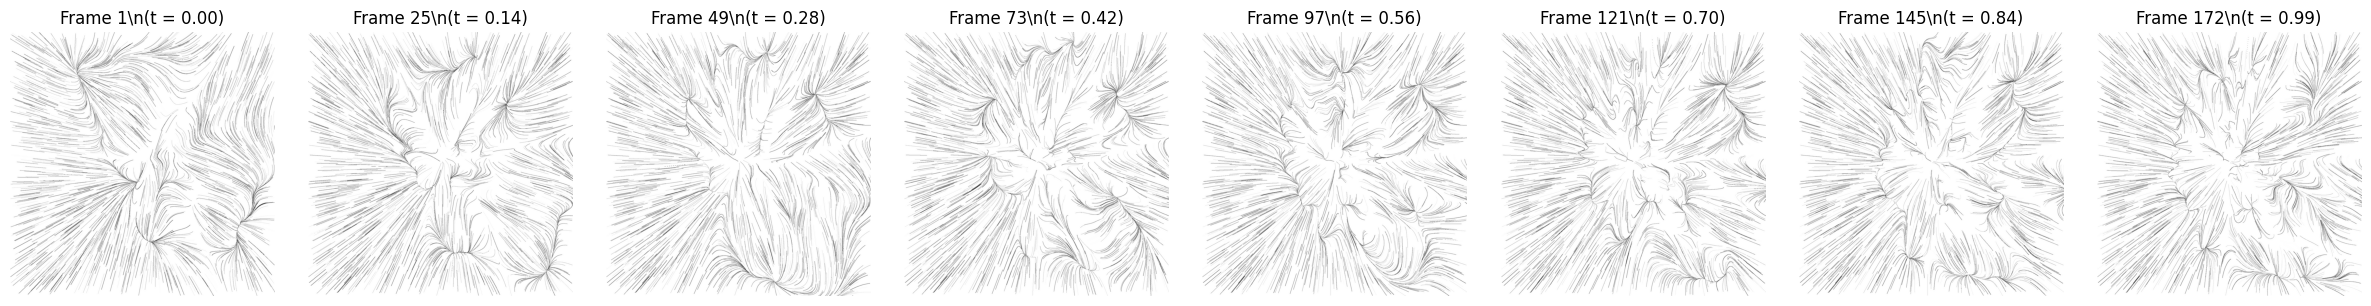

\nSuper smooth animation complete! 🎬✨


In [18]:
# Create super smooth animation across all 11 keyframes
print("Creating super smooth animation across all 11 keyframes...")
print(f"Total keyframes available: {len(vfields)}")

# Skip vfields[0] as mentioned it's collapsed at origin, use vfields[1] through vfields[10]
keyframes_to_use = vfields[1:]  # This gives us 10 keyframes (indices 1-10)
print(f"Using keyframes 1-10 ({len(keyframes_to_use)} keyframes)")

# Parameters for super smooth animation
super_smooth_params = {
    'W': 800,
    'H': 800,
    'particles': 2000,        # More particles for richer detail
    'steps': 400,             # More steps for smoother particle traces
    'step_size': 0.0002,      # Smaller steps for finer detail
    'bg_color': (255, 255, 255),
    'trace_color': (0, 0, 0),
    'random_colors': True,
    'antialias': True,        # Enable antialiasing for quality
    'aa_factor': 2            # 2x antialiasing
}

# Create super smooth animation with more frames per transition
frames_per_transition = 20  # 20 frames between each keyframe for ultra-smooth transitions
print(f"Frames per transition: {frames_per_transition}")
print(f"Total expected frames: {(len(keyframes_to_use) - 1) * frames_per_transition + 1}")

# Use smoothstep interpolation for even smoother transitions
def create_super_smooth_animation(vfields_list, frames_per_transition=20, render_params=None, interpolation_method='smoothstep'):
    """
    Create a super smooth animation through multiple keyframes using advanced interpolation.
    """
    if render_params is None:
        render_params = super_smooth_params
    
    all_frames = []
    total_transitions = len(vfields_list) - 1
    
    for i in range(total_transitions):
        print(f"\\nTransition {i+1}/{total_transitions}: keyframe {i+1} -> keyframe {i+2}")
        
        # Create frames for this transition
        transition_frames = []
        
        for frame_idx in range(frames_per_transition):
            alpha = frame_idx / (frames_per_transition - 1)  # 0.0 to 1.0
            
            # Use smoothstep interpolation for ultra-smooth transitions
            if interpolation_method == 'smoothstep':
                smooth_alpha = 3 * alpha**2 - 2 * alpha**3
            elif interpolation_method == 'cosine':
                smooth_alpha = (1 - torch.cos(torch.tensor(np.pi * alpha))) / 2
            else:  # linear
                smooth_alpha = alpha
            
            # Interpolate vector field
            grid = vfields_list[i]['grid'].clone()
            displacement = ((1 - smooth_alpha) * vfields_list[i]['displacement'] + 
                          smooth_alpha * vfields_list[i+1]['displacement'])
            
            interpolated_vfield = {
                'grid': grid,
                'displacement': displacement
            }
            
            # Move to device and render
            grid_gpu = interpolated_vfield['grid'].to(device)
            displacement_gpu = interpolated_vfield['displacement'].to(device)
            
            frame = render_flow_field(grid_gpu, displacement_gpu, **render_params)
            transition_frames.append(frame)
            
            print(f"  Frame {frame_idx+1}/{frames_per_transition} (α = {alpha:.3f}, smooth_α = {smooth_alpha:.3f})")
        
        # Add frames (skip first frame if not the first transition to avoid duplicates)
        if i == 0:
            all_frames.extend(transition_frames)
        else:
            all_frames.extend(transition_frames[1:])  # Skip first frame to avoid duplicate
    
    return all_frames

# Generate the super smooth animation
super_smooth_frames = create_super_smooth_animation(
    keyframes_to_use, 
    frames_per_transition=frames_per_transition, 
    render_params=super_smooth_params,
    interpolation_method='smoothstep'
)

print(f"\\nGenerated {len(super_smooth_frames)} total frames for super smooth animation!")

# Save the super smooth animation
super_smooth_filename = "vector_field_complete_animation_ultra_smooth.gif"
save_animation_gif(super_smooth_frames, super_smooth_filename, duration=80, loop=0)

print(f"Super smooth complete animation saved as: {super_smooth_filename}")
print(f"Animation duration: {len(super_smooth_frames) * 80 / 1000:.1f} seconds")
print(f"File size check...")

# Display sample frames from across the entire sequence
sample_count = 8
sample_step = len(super_smooth_frames) // (sample_count - 1)
sample_indices = [i * sample_step for i in range(sample_count - 1)] + [len(super_smooth_frames) - 1]

plt.figure(figsize=(24, 3))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, sample_count, i+1)
    plt.imshow(super_smooth_frames[idx])
    plt.title(f"Frame {idx+1}\\n(t = {idx/len(super_smooth_frames):.2f})")
    plt.axis('off')

plt.tight_layout()
plt.show()

print("\\nSuper smooth animation complete! 🎬✨")